In [30]:
import matplotlib.pyplot as plt
import yaml
import os
import pickle
from collections import Counter

In [2]:
src_dir = 'o:/wikiart/Contemporary_Realism'

In [6]:
!{sys.executable} -m pip install pip install --quiet azure-cognitiveservices-vision-computervision

In [12]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes as vft
from msrest.authentication import CognitiveServicesCredentials

config = yaml.load(open('../config.yaml').read(),Loader=yaml.loader.SafeLoader)
credentials = CognitiveServicesCredentials(config['ComputerVision']['Key'])
client = ComputerVisionClient(endpoint=config['ComputerVision']['Endpoint'],credentials=credentials)

cv = {}
for f in os.listdir(src_dir):
    with open(os.path.join(src_dir,f),'rb') as fi:
        res = client.analyze_image_in_stream(fi,visual_features=[vft.categories,vft.tags,vft.description,vft.faces,vft.objects,vft.color,vft.adult])
    cv[f] = res

{'ComputerVision': {'Endpoint': 'https://westus.api.cognitive.microsoft.com/', 'Key': 'fc215cc01b1e4ca0b6f64a1740aa4ae0'}}


In [15]:
with open('cv.pkl','wb') as f:
    pickle.dump(cv,f)

In [38]:
r = list(cv.values())[2]
r.faces[0].as_dict()

{'age': 35,
 'gender': 'Female',
 'face_rectangle': {'left': 257, 'top': 137, 'width': 119, 'height': 119}}

In [32]:
def top(l,n=3):
    cnt = Counter(l)
    return cnt.most_common(n)

d = {}
for f in cv.keys():
    artist = f.split('_')[0]
    al = d.get(artist,[])
    al.extend([x.object_property for x in cv[f].objects])
    d[artist] = al

for k,v in d.items():
    print(f"{k} -> {top(v)}")

john-miller -> [('palm tree', 4), ('tower', 2), ('boat', 2)]
eric-fischl -> [('person', 138), ('mammal', 15), ('dog', 9)]
richard-whitney -> [('person', 23), ('tie', 9), ('computer keyboard', 1)]
jamie-wyeth -> [('person', 23), ('mammal', 17), ('bird', 6)]
janet-fish -> [('Tableware', 2), ('vase', 2), ('Food', 1)]
lucian-freud -> [('flower', 2), ('person', 2), ('plant', 2)]
neil-welliver -> [('person', 13), ('animal', 2), ('dog', 2)]
fairfield-porter -> [('person', 14), ('chair', 5), ('Vehicle', 1)]
gilles-aillaud -> [('animal', 6), ('turtle', 3), ('bird', 3)]
philip-pearlstein -> [('person', 4), ('mammal', 1), ('keyboard instrument', 1)]
konstantin-vasilyev -> [('animal', 1), ('Clock', 1), ('dog', 1)]
chuck-close -> [('Food', 1)]
dimitris-mytaras -> [('dog', 3), ('person', 2)]
mostafa-dashti -> [('mammal', 2), ('Invertebrate', 1)]
donald-sultan -> [('Fruit', 1)]


In [44]:
d = {}
for f in cv.keys():
    artist = f.split('_')[0]
    al = d.get(artist,{ "n" : 0, "age" : 0, "genders" : [] })
    al['age'] += sum([x.age for x in cv[f].faces])
    al['n'] += len(cv[f].faces)
    al['genders'].extend([x.gender.name for x in cv[f].faces])
    d[artist] = al

def female_ratio(l):
    cnt = Counter(l)
    return cnt['female']/len(l)

r = { k : { "age" : v['age']/v['n'], "female" : female_ratio(v['genders'])  } for k,v in d.items() if v['n']>0 }
r

{'eric-fischl': {'age': 48.63333333333333, 'female': 0.4},
 'richard-whitney': {'age': 50.407407407407405, 'female': 0.37037037037037035},
 'jamie-wyeth': {'age': 36.13636363636363, 'female': 0.5454545454545454},
 'lucian-freud': {'age': 22.0, 'female': 1.0},
 'neil-welliver': {'age': 26.6, 'female': 0.8},
 'fairfield-porter': {'age': 29.857142857142858,
  'female': 0.42857142857142855},
 'philip-pearlstein': {'age': 48.0, 'female': 0.0},
 'konstantin-vasilyev': {'age': 43.0, 'female': 0.5},
 'chuck-close': {'age': 29.0, 'female': 0.5}}

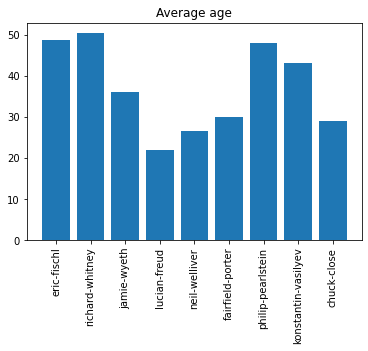

In [50]:
plt.bar(x = r.keys(), height = [v['age'] for k,v in r.items()])
plt.xticks(rotation=90)
plt.title('Average age')
plt.show()

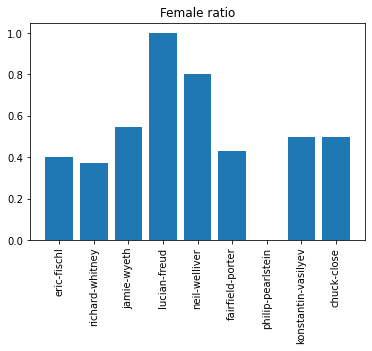

In [51]:
plt.bar(x = r.keys(), height = [v['female'] for k,v in r.items()])
plt.xticks(rotation=90)
plt.title('Female ratio')
plt.show()

In [52]:
!{sys.executable} -m pip install colorthief

In [53]:
from colorthief import ColorThief

d = {}
for f in cv.keys():
    artist = f.split('_')[0]
    col = ColorThief(os.path.join(src_dir,f)).get_color(1)
    d[artist] = d.get(artist,[]) + [col]
print(d)

{'john-miller': [(198, 205, 202), (145, 148, 163), (122, 155, 215), (149, 203, 232), (112, 125, 174), (123, 152, 196), (94, 144, 200), (63, 113, 160), (136, 134, 186), (93, 158, 224), (83, 131, 207), (118, 162, 212), (80, 131, 191), (190, 119, 164), (46, 68, 151), (90, 124, 169), (84, 133, 210), (56, 126, 134), (211, 203, 191), (58, 100, 182), (106, 169, 211), (118, 107, 78), (161, 161, 162), (140, 183, 207), (205, 208, 212), (69, 108, 105), (183, 204, 212), (224, 215, 211), (57, 79, 101), (63, 78, 108), (65, 140, 142), (28, 89, 160), (62, 121, 230), (101, 90, 78), (85, 125, 163), (53, 117, 184), (112, 138, 222), (132, 145, 188), (94, 124, 170), (95, 149, 215), (64, 47, 59), (82, 137, 152), (113, 147, 223), (77, 118, 166), (118, 125, 174), (134, 184, 198), (49, 96, 170), (224, 109, 27), (120, 73, 140), (9, 114, 148), (64, 88, 155), (100, 128, 167), (214, 204, 200), (173, 178, 176), (91, 124, 212), (124, 117, 132), (111, 141, 205), (164, 149, 142), (217, 223, 220), (219, 206, 194), (57,

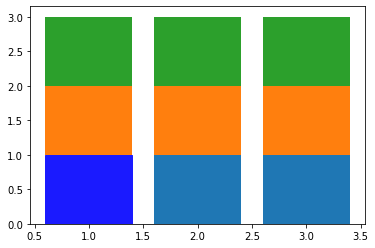

In [66]:
plt.subplots()
p1=plt.bar([1,2,3],[1,1,1])
p2=plt.bar([1,2,3],[1,1,1],bottom=[1,1,1])
p3=plt.bar([1,2,3],[1,1,1],bottom=[2,2,2])
p1[0].set_color((0.1,0.1,1))

In [70]:
from sklearn.cluster import kmeans_plusplus
import numpy as np 

p = {}
for k,v in d.items():
    if len(v)>=3:
        cent, ind = kmeans_plusplus(np.array(v),3)
        p[k] = cent


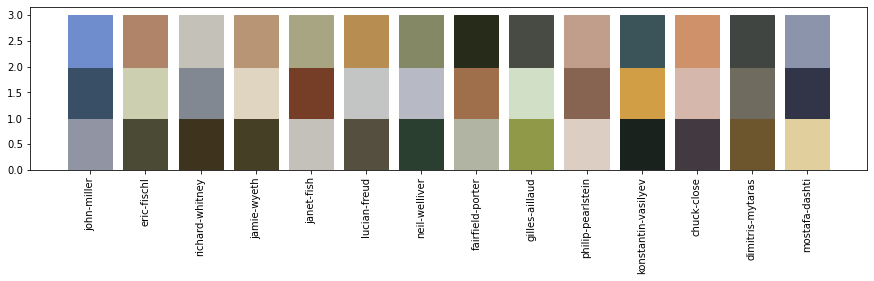

In [79]:
plt.subplots(figsize=(15,3))
ones = [1 for _ in p.keys()]
p1=plt.bar(p.keys(),ones)
p2=plt.bar(p.keys(),ones,bottom=ones)
p3=plt.bar(p.keys(),ones,bottom=[2 for _ in p.keys()])
for i,(k,v) in enumerate(p.items()):
    p1[i].set_color(v[0]/255.0)
    p2[i].set_color(v[1]/255.0)
    p3[i].set_color(v[2]/255.0)
plt.xticks(rotation=90)
plt.show()
